In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt

In [3]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = \
                Affine(self.params['W1'], self.params['b1'])
        self.layers['Affine2'] = \
                Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads


In [5]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size =600
learning_rate =.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.17818333333333333 0.1753
0.77505 0.783
0.8656 0.8712
0.8848166666666667 0.891
0.8955833333333333 0.8987
0.90075 0.9028
0.9039 0.9061
0.90735 0.9113
0.9102333333333333 0.9134
0.9121833333333333 0.9139
0.9127333333333333 0.9147
0.9145666666666666 0.9165
0.9162333333333333 0.9177
0.9176 0.9187
0.9183 0.9196
0.9180166666666667 0.9196
0.9196333333333333 0.9202
0.9201833333333334 0.9202
0.9206 0.9205
0.9211666666666667 0.9207
0.92145 0.9205
0.9221333333333334 0.9221
0.9229 0.9216
0.9237333333333333 0.9226
0.92325 0.9222
0.9243666666666667 0.9226
0.9246666666666666 0.9227
0.9247333333333333 0.9234
0.92485 0.9216
0.9260166666666667 0.9243
0.9252666666666667 0.9242
0.9256666666666666 0.9241
0.9255166666666667 0.9226
0.9265166666666667 0.9241
0.9268 0.9223
0.9266333333333333 0.9237
0.92655 0.9226
0.9262666666666667 0.9245
0.9271333333333334 0.923
0.92715 0.923
0.9269166666666667 0.9237
0.9276166666666666 0.9227
0.9284666666666667 0.9235
0.9274833333333333 0.9222
0.92835 0.9221
0.9282 0.9227
0.

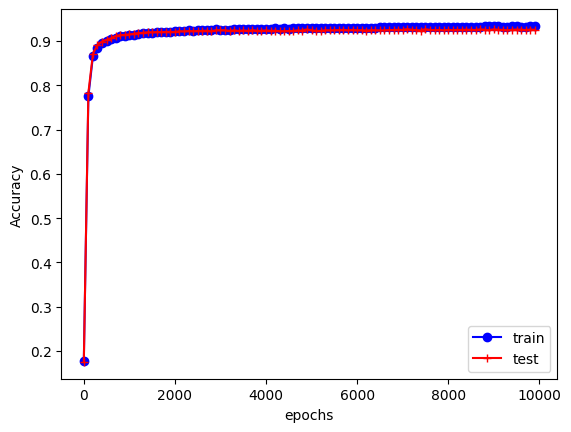

In [8]:
plt.plot(list(range(0,10000,100)), train_acc_list, marker='o', linestyle='-', color='blue', label='train')
plt.plot(list(range(0,10000,100)), test_acc_list, marker='+', linestyle='-', color='red', label='test')
plt.legend(loc='lower right')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()